# Semaine 1/6

#### Importation des librairies requises

In [1]:
import cv2
import os
from skimage.filters import sobel
import tensorflow as tf
import requests
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
#from keras.optimizers import SGD
#from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model

### Lire et redimenssioner l'image

In [7]:
src = cv2.imread("/content/drive/MyDrive/myData/profile/t14.jpeg")
size = (600, 600)
img = cv2.resize(src, size)


### Affichage d'une image

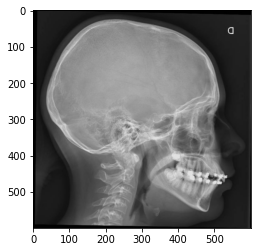

In [8]:
plt.imshow(img)
plt.show()

## Filtres passe-bas

Filtre ayant pour objet de couper les hautes fréquences. Cette opération a pour effet
de réduire le bruit et d’ajouter du flou (c-à-d. éliminer les détails de l’images)


In [ ]:
my_img = cv2.imread('img2.jpeg', 0)
# le filtre moyenneur
median_img = cv2.medianBlur(my_img, 5)
#filtre gaussien de taille 5 x 5 et d'écart-type 3
gaussian = cv2.GaussianBlur(my_img, (5, 5), 3)
plt.figure(figsize = (15, 13))
plt.subplot(2, 3, 1)
plt.imshow(my_img, cmap='gray')
plt.title("Image originle")
plt.subplot(2, 3, 2)
plt.imshow(median_img, cmap="gray")
plt.title("Median")
plt.subplot(2, 3, 3)
plt.imshow(gaussian, cmap="gray")
plt.title("Gaussian")
plt.show()

## Filtres passe-haut

Filtre ayant pour objet de couper les basses fréquences. Cette opération a pour effet
d’accentuer les détails de l’image, les contours et le bruit. Toutes les régions uniformes
sont éliminées par cette procédure. 

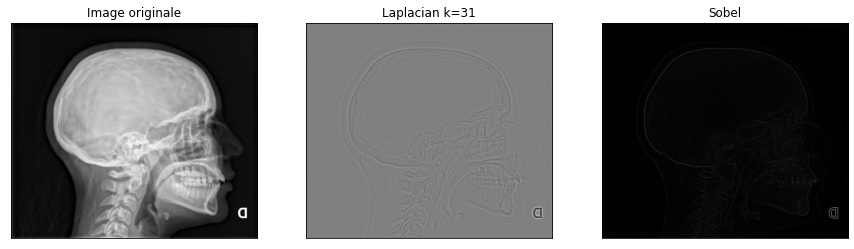

In [ ]:
img = cv2.imread('img2.jpeg', 0)
# Filtre laplacien 
lap = cv2.Laplacian(img, cv2.CV_32F)
# Filtre laplacien k = 3
lap5 = cv2.Laplacian(img, cv2.CV_32F,ksize=31)
# Filtre Sobel
sobel_img = sobel(img)

plt.figure(figsize = (15, 13))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(lap5,cmap = 'gray')
plt.title('Laplacian k=31'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_img,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()



```
# This is formatted as code
```

## Détecteur de Canny

Algorithme :
1. Lissage de l’image avec un filtre gaussien.
2. Calcul du gradient (magnitude et angle)
3. Suppression des non-maxima sur l’image de magnitude
4. Seuillage par hystérésis


### Visualisation des resultats pour différents seuils haut et bas


In [ ]:
cv2.namedWindow('window')

def nothing(x):
	pass

cv2.createTrackbar('lower', 'window', 0, 255, nothing)
cv2.createTrackbar('upper', 'window', 0, 255, nothing)

img = cv2.imread('img2.jpeg')
#img = cv2.GaussianBlur(img, (5, 5), 3)
img = cv2.resize(img, (800, 500))

# cap = cv2.VideoCapture(0)

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

while True:
# 	_, img = cap.read()

# 	img = cv2.blur(img, (3,3))

# 	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	x = cv2.getTrackbarPos('lower', 'window')
	y = cv2.getTrackbarPos('upper', 'window')

	edge = cv2.Canny(img, x, y)
	cv2.imshow('window', edge)

	if cv2.waitKey(1) == 27:
		cv2.destroyAllWindows()
		break
        
#63
#120

### Autres résultats

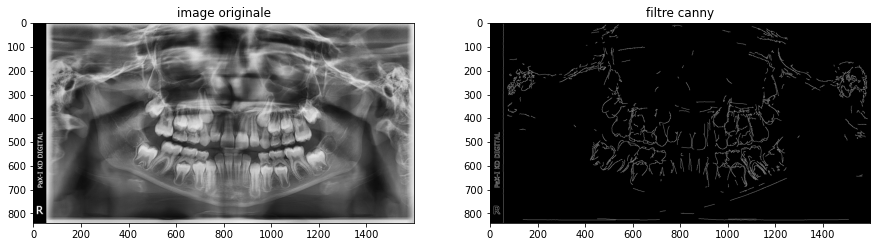

In [ ]:
image = cv2.imread('p1.jpeg')
edges = cv2.Canny(image, 100, 200)
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = "gray")
plt.title('image originale')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap = "gray")
plt.title('filtre canny')
plt.show()

## Développement d'un algorithme afin de détecter le "point S"

### Objectif :

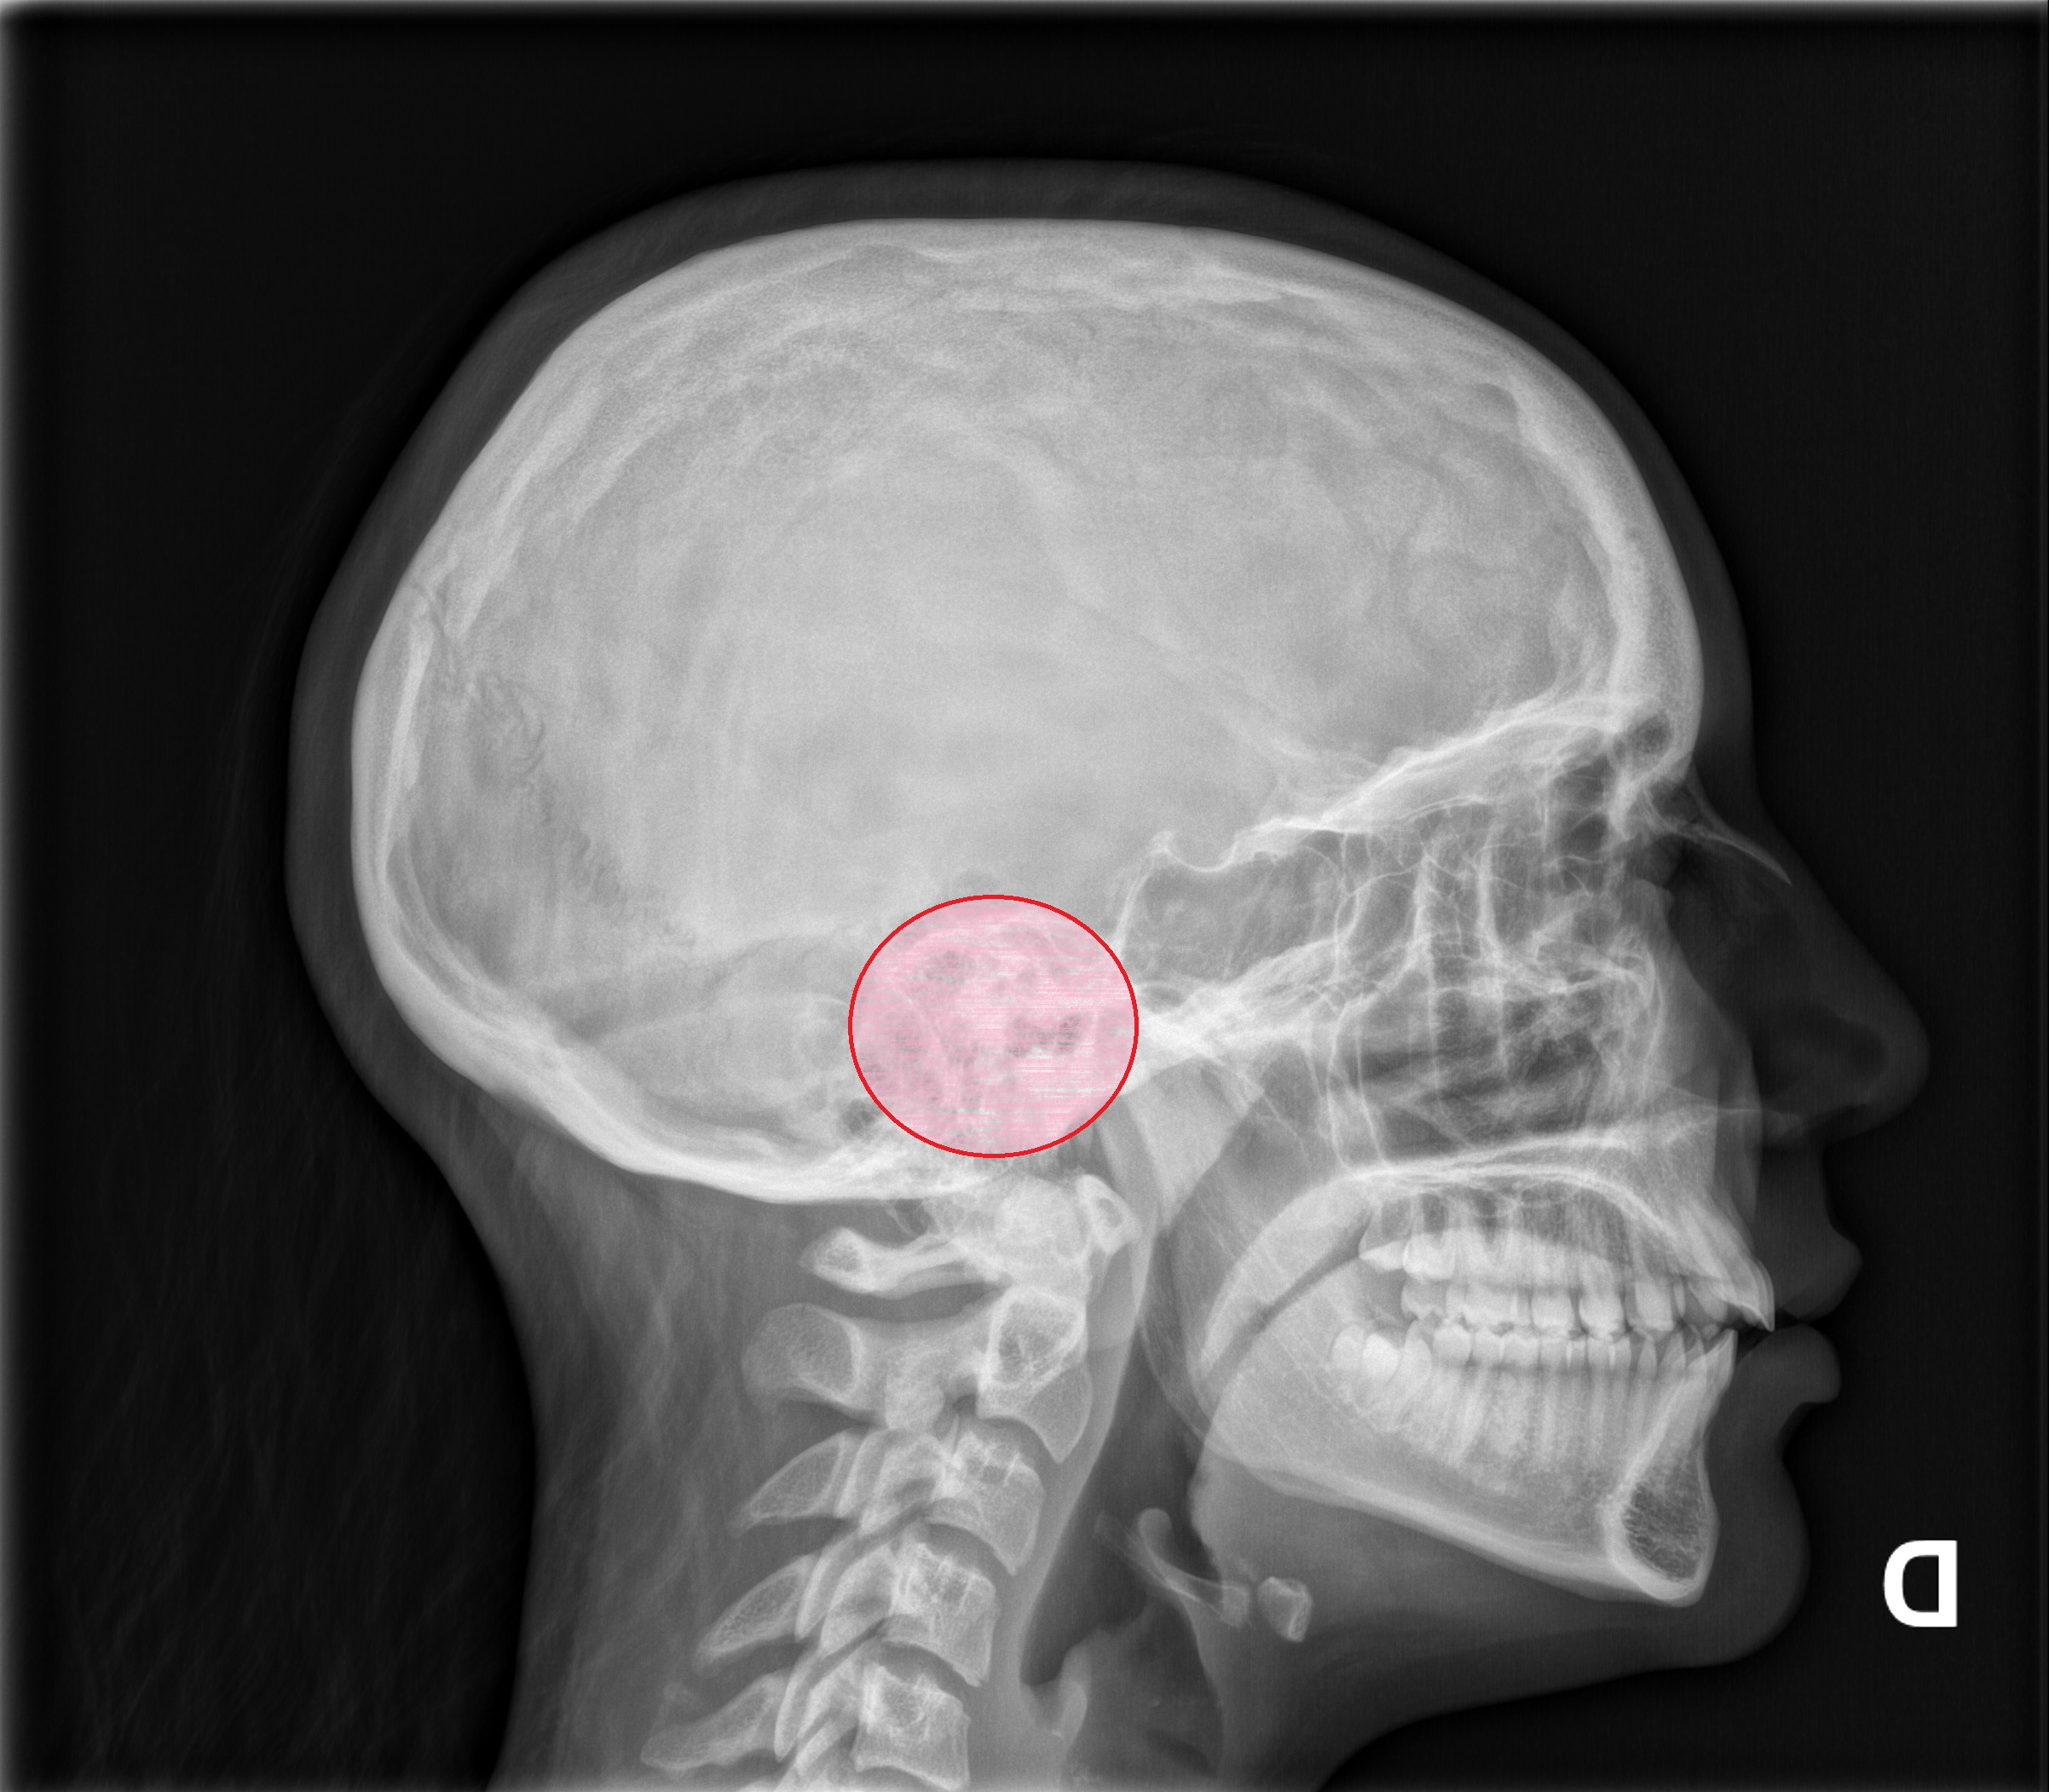

### Visualisation de l'histogramme de l'image originale

In [ ]:
my_img = cv2.imread('img2.jpeg', 0)
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.imshow(my_img, cmap='gray')
plt.title("Image originle")
plt.subplot(1, 2, 2)
plt.hist(my_img)
plt.title("Histogramme")
plt.show()

### Développement d'un filtre pour Faire apparaitre les pixels désirés 

In [ ]:
def mon_filtre(img):

    #img = cv2.imread('img2.jpeg', 0)
    img[img< 35] = 0
    img[img > 200] = 255
    return img
    #plt.imshow(img, cmap="gray")
    #plt.show()

### Chargement des images de teste

In [ ]:
img1 = cv2.imread('img1.png', 0)

img2 = cv2.imread('img2.jpeg', 0)

img3 = cv2.imread('img3.jpg', 0)


In [ ]:
plt.figure(figsize = (15, 15))
plt.subplot(4, 4, 1)
plt.imshow(img1, cmap="gray")
plt.title("Image1 : Avant filtre")
plt.subplot(4, 4, 2)
filtre1 = mon_filtre(img1)
plt.imshow(filtre1, cmap = "gray")
plt.title("Image1 : Apres filtre")
plt.subplot(4, 4, 3)
plt.hist(filtre1)
plt.title("Histogramme")
#extraction
filtre1[filtre1 > 210] = 255
filtre1[filtre1<= 210] = 0
plt.subplot(4, 4, 4)
plt.imshow(filtre1, cmap = "gray")
plt.title("+ Algorithme")

plt.subplot(4, 4, 5)
plt.imshow(img2, cmap="gray")
plt.title("Image2 : Avant filtre")
plt.subplot(4, 4, 6)
filtre2 = mon_filtre(img2)
plt.imshow(filtre2, cmap = "gray")
plt.title("Image2 : Apres filtre")
plt.subplot(4, 4, 7)
plt.hist(filtre2)
plt.title("Histogramme")
#extraction
filtre2[filtre2 > 210] = 255
filtre2[filtre2<= 210] = 0
plt.subplot(4, 4, 8)
plt.imshow(filtre2, cmap = "gray")
plt.title("+ Algorithme")

plt.subplot(4, 4, 9)
plt.imshow(img3, cmap="gray")
plt.title("Image3 : Avant filtre")
plt.subplot(4, 4, 10)
filtre3 = mon_filtre(img3)
plt.imshow(filtre3, cmap = "gray")
plt.title("Image3 : Apres filtre")
plt.subplot(4, 4, 11)
plt.hist(filtre3)
plt.title("Histogramme")
#extraction
filtre3[filtre3 > 210] = 255
filtre3[filtre3<= 210] = 0
plt.subplot(4, 4, 12)
plt.imshow(filtre3, cmap = "gray")
plt.title("+ Algorithme")

plt.show()

### Remarques :

* Difficulté de trouver des caractéristiques permettant de développer un algorithme capable de reconnaitre "le point S"
* La différence au niveau du volume lumineux et la taille des images ont compliqué la tâche

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2), padding="same"))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

print(model.summary()) 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_30 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        1792      
                                                                 
 zero_padding2d_31 (ZeroPadd  (None, 77, 77, 64)       0         
 ing2D)                                                          
                                                                 
 conv2d_31 (Conv2D)          (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                      

C:\Users\ADMIN\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

conv2d_30 (3, 3, 3, 64)


## Les différents filtres de convolution

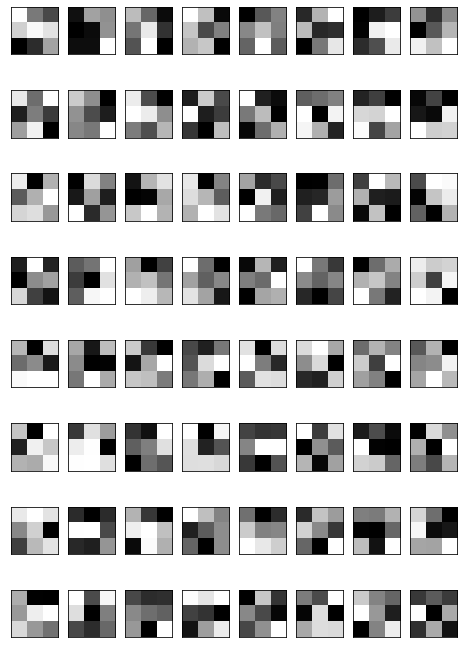

In [ ]:
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()   

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_30_input (In  [(None, 224, 224, 3)]    0         
 putLayer)                                                       
                                                                 
 zero_padding2d_30 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        1792      
                                                                 
 zero_padding2d_31 (ZeroPadd  (None, 77, 77, 64)       0         
 ing2D)                                                          
                                                                 
 conv2d_31 (Conv2D)          (None, 25, 25, 64)        36928     
                                                             

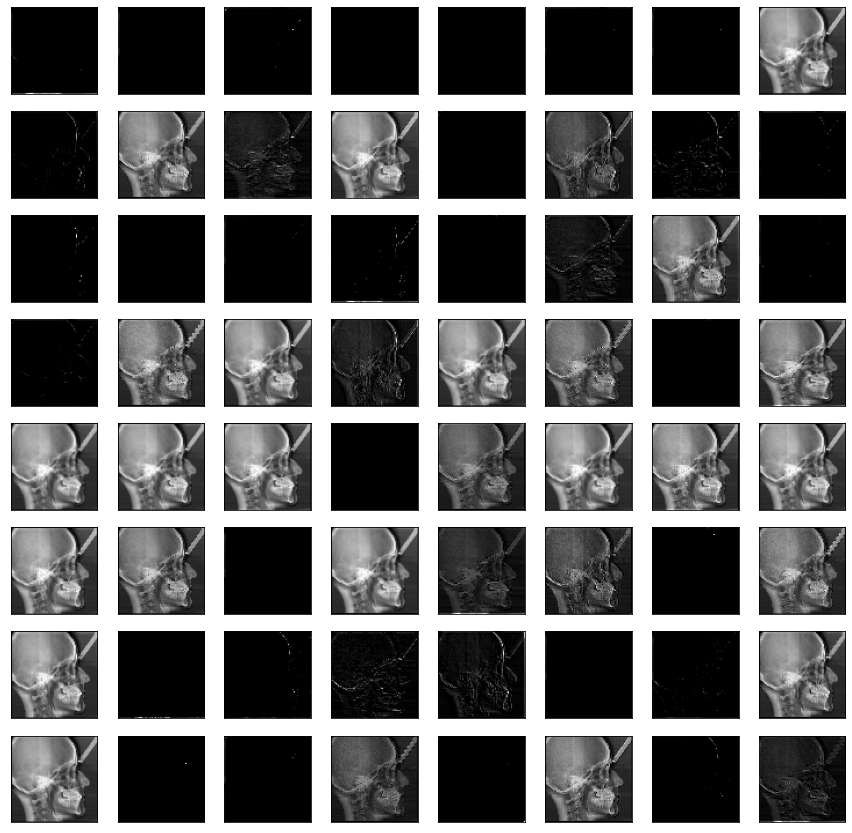

    ======================================== PROCHAINE COUCHE ==============================================


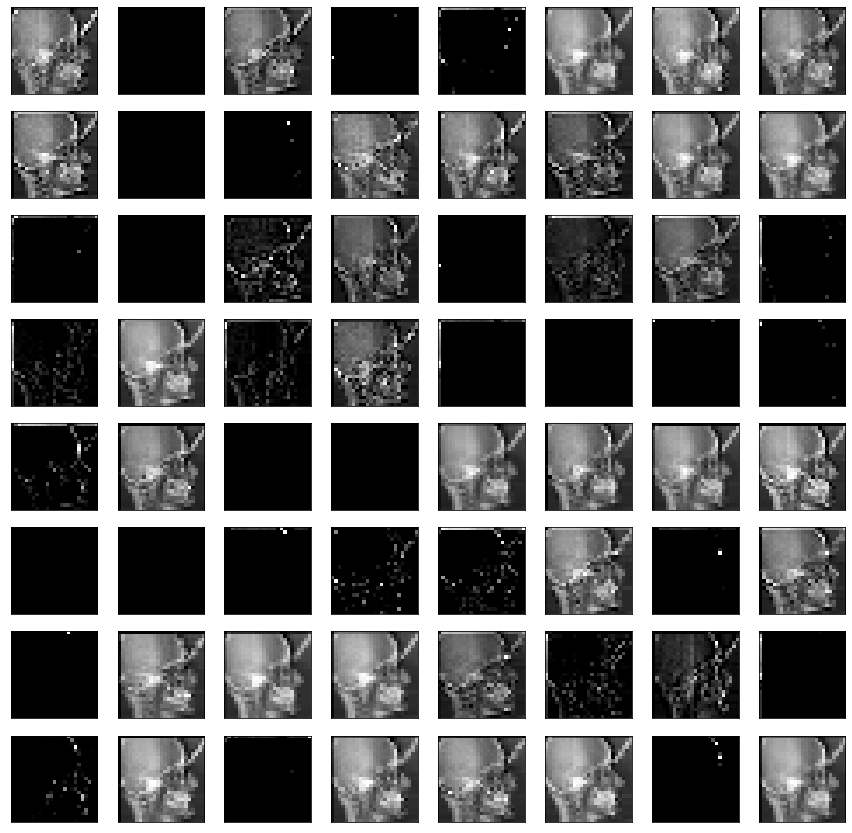

    ======================================== PROCHAINE COUCHE ==============================================


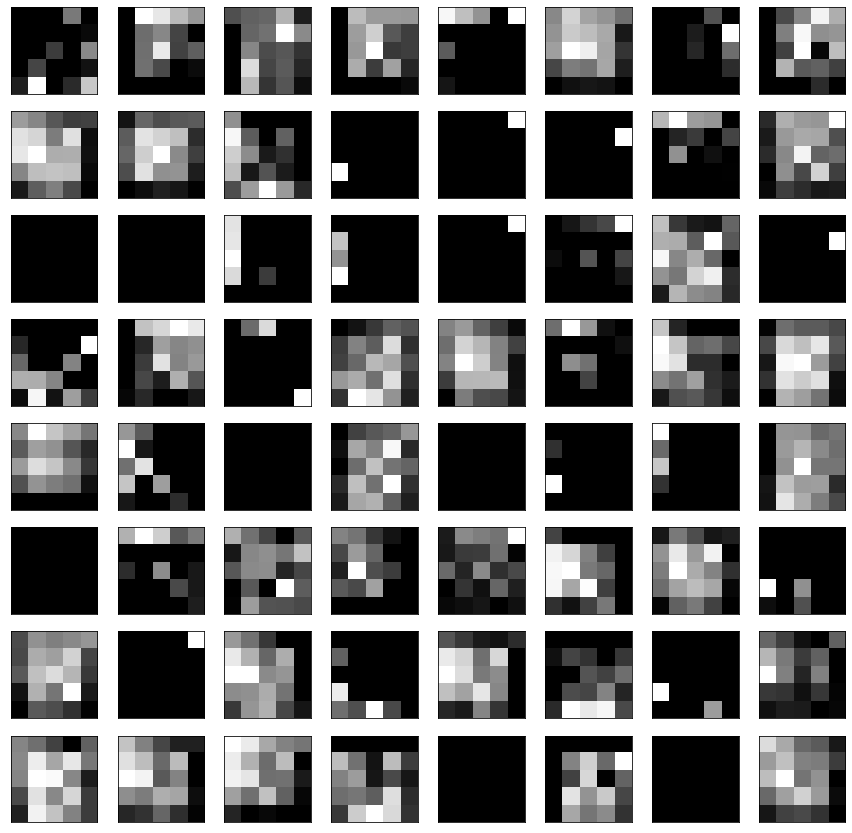

In [ ]:
#### Now plot filter outputs    

#Define a new truncated model to only include the conv layers of interest
#conv_layer_index = [1, 3, 6, 8, 11, 13, 15]
conv_layer_index = [1, 3, 6]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import img_to_array, load_img
img = load_img('img1.png', target_size=(224, 224)) #VGG user 224 as input

# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 8
for ftr in feature_output:
    #pos = 1
    print("    ======================================== PROCHAINE COUCHE ==============================================")
    fig=plt.figure(figsize=(15, 15))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

# Analyse et résultats sur le point S

In [10]:
def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        if img is not None:
            images.append(img)
    return images

In [11]:
img_list=load_images_from_folder("/content/drive/MyDrive/myData/profile")

In [9]:
def resize_img(img, width, height):
    img = cv2.resize(img, (width, height))
    return img

In [12]:
data = {}
for i in range(len(img_list)):
    data[f"img{i + 1}"] = resize_img(img_list[i], 500, 500)

In [13]:
img = data['img1']
img.shape

(500, 500, 3)

In [ ]:
def click_event(event, x, y, flags, params):

	# checking for left mouse clicks
	if event == cv2.EVENT_LBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		cv2.putText(img, str(x) + ',' +
					str(y), (x,y), font,
					1, (255, 0, 0), 2)
		cv2.imshow('image', img)

	# checking for right mouse clicks	
	if event==cv2.EVENT_RBUTTONDOWN:

		# displaying the coordinates
		# on the Shell
		print(x, ' ', y)

		# displaying the coordinates
		# on the image window
		font = cv2.FONT_HERSHEY_SIMPLEX
		b = img[y, x, 0]
		g = img[y, x, 1]
		r = img[y, x, 2]
		cv2.putText(img, str(b) + ',' +
					str(g) + ',' + str(r),
					(x,y), font, 1,
					(255, 255, 0), 2)
		cv2.imshow('image', img)

# driver function
if __name__=="__main__":

	# reading the image
	img = data['img21']

	# displaying the image
	cv2.imshow('image', img)

	# setting mouse handler for the image
	# and calling the click_event() function
	cv2.setMouseCallback('image', click_event)

	# wait for a key to be pressed to exit
	cv2.waitKey(0)

	# close the window
	cv2.destroyAllWindows()


In [ ]:
entetes = [
     u'images',
     u'X_position',
     u'Y_position'
]

valeurs = [
     [u'Image1', "296", "235"],
    [u'Image2', "286", "251"],
    [u'Image3', "286", "280"],
    [u'Image4', "272", "228"],
    [u'Image5', "270", "259"],
    [u'Image6', "285", "251"],
    [u'Image7', "269", "266"],
    [u'Image8', "274", "277"],
    [u'Image9', "283", "264"],
    [u'Image10', "263", "263"],
    [u'Image11', "303", "234"],
    [u'Image12', "279", "230"],
    [u'Image13', "284", "244"],
    [u'Image14', "263", "217"],
    [u'Image15', "263", "263"],
    [u'Image16', "288", "254"],
    [u'Image17', "267", "241"],
    [u'Image18', "265", "242"],
    [u'Image19', "264", "255"],
    [u'Image20', "298", "246"],
    [u'Image21', "277", "221"],
    [u'Image22', "264", "244"]
]

f = open('monFichier.csv', 'w')
ligneEntete = ",".join(entetes) + "\n"
f.write(ligneEntete)
for valeur in valeurs:
     ligne = ",".join(valeur) + "\n"
     f.write(ligne)

f.close()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('monFichier.csv')

In [ ]:
df.head(22)

images  X_position  Y_position
0    Image1         296         235
1    Image2         286         251
2    Image3         286         280
3    Image4         272         228
4    Image5         270         259
5    Image6         285         251
6    Image7         269         266
7    Image8         274         277
8    Image9         283         264
9   Image10         263         263
10  Image11         303         234
11  Image12         279         230
12  Image13         284         244
13  Image14         263         217
14  Image15         263         263
15  Image16         288         254
16  Image17         267         241
17  Image18         265         242
18  Image19         264         255
19  Image20         298         246
20  Image21         277         221
21  Image22         264         244

In [ ]:
df.describe()

X_position  Y_position
count   22.000000   22.000000
mean   277.227273  248.409091
std     12.401735   16.924648
min    263.000000  217.000000
25%    265.500000  236.500000
50%    275.500000  248.500000
75%    285.750000  262.000000
max    303.000000  280.000000

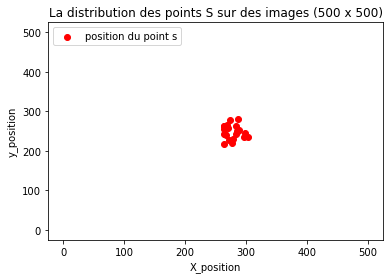

In [ ]:
x = np.linspace(0, 500, 22)
y = np.linspace(0, 500, 22)
x1 = df['X_position']
y1 = df['Y_position']
plt.scatter(x, y, c = 'white')
plt.scatter(x1, y1, c = 'red', label="position du point s")
plt.xlabel('X_position')
plt.ylabel('y_position')
plt.title('La distribution des points S sur des images (500 x 500)')
plt.legend()
plt.show()

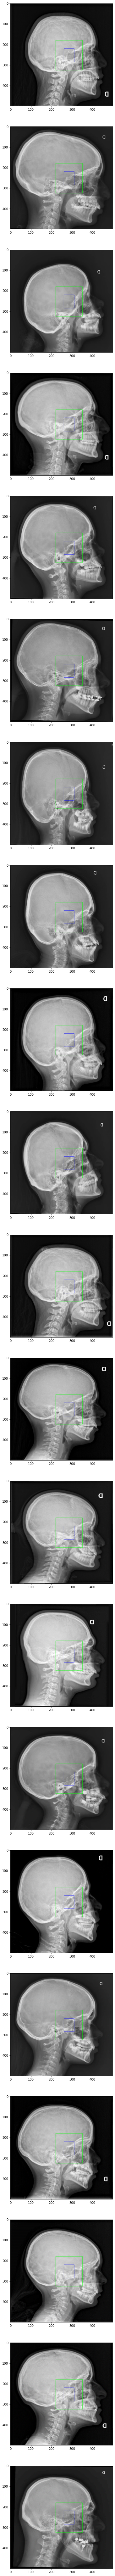

In [ ]:
start_point = (260, 285)
end_point = (310, 220)
color = (0, 0, 255)
thickness = 1
###################
#Agrandir le cadre de décision par 40 pixels
start_point1 = (220, 325)
end_point1 = (350, 180)
color1 = (0, 255, 0)
thickness1 = 1
####################
plt.figure(figsize = (150, 150))
for i in range(len(img_list)):
    
    image = resize_img(img_list[i], 500, 500)
    image_with_rectangle = cv2.rectangle(
        img = image,
        pt1 = start_point,
        pt2 = end_point, 
        color = color, 
        thickness = thickness
    )
    #plt.subplot(len(img_list), 2, k)
#     plt.imshow(image_with_rectangle)
#     plt.show()
    ####################################
    # cadre augmenté
    image_with_rectangle1 = cv2.rectangle(
        img = image,
        pt1 = start_point1,
        pt2 = end_point1, 
        color = color1, 
        thickness = thickness1
    )
    plt.subplot(len(img_list), 1, i+1)
    plt.imshow(image_with_rectangle1)
plt.show()

## Extraction des images (50 x 50) a partir du cadre vert

### Les cordonnées du cadre vert sont:
* de la ligne 180 jusqu'a la ligne 325 (145 ligne)
* de la colonne 220 jusqu'a la colonne 350 (130 colonne)

In [14]:
# 325-50  275 included => 275+5 = 280 resize_img function included
def extract_imgs(img, width, height):
    img = resize_img(img, 500, 500)
    imgs_list = []
    for i in range(180, 280, 5):
        for j in range(220, 305, 5):
            new_img = img[i:i + width, j:j + height]
            new_img = new_img/255.0
            new_img = cv2.resize(new_img, (100, 100))
            imgs_list.append(new_img)
    return imgs_list

In [15]:
img1 = img_list[0]
images = extract_imgs(img1, 50, 50)
len(images)

340

#### apartir d'une seule image on peut extraire 340 images de taille (50 x 50) potentielle [ pour 5 pixels comme pas]

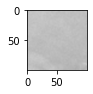

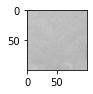

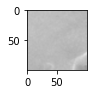

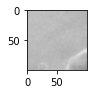

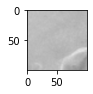

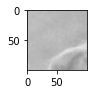

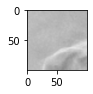

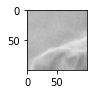

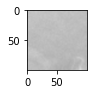

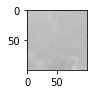

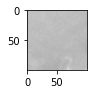

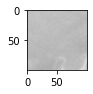

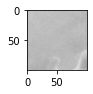

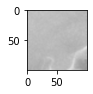

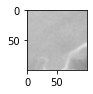

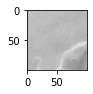

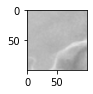

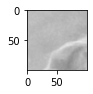

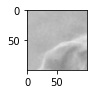

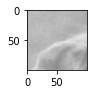

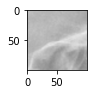

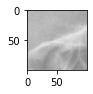

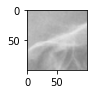

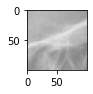

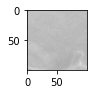

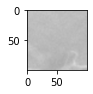

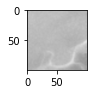

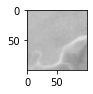

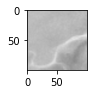

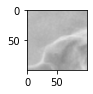

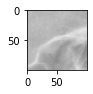

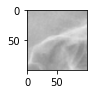

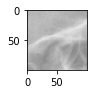

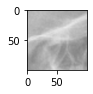

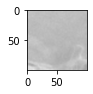

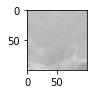

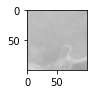

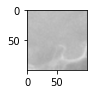

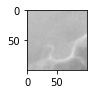

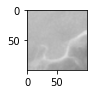

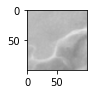

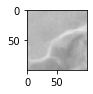

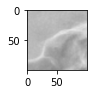

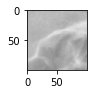

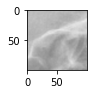

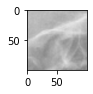

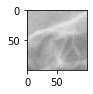

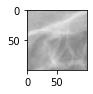

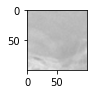

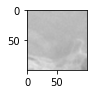

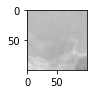

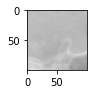

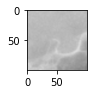

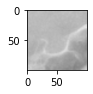

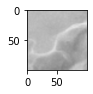

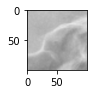

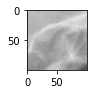

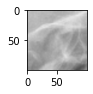

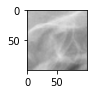

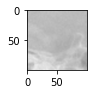

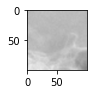

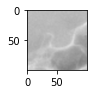

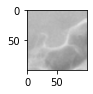

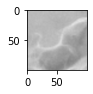

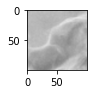

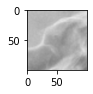

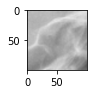

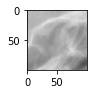

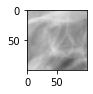

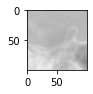

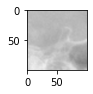

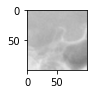

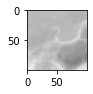

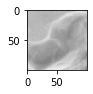

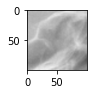

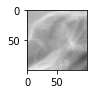

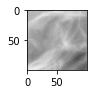

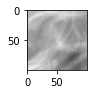

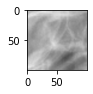

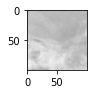

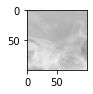

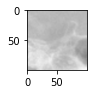

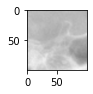

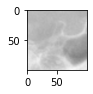

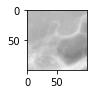

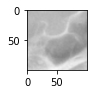

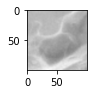

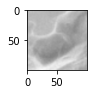

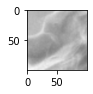

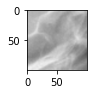

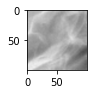

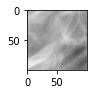

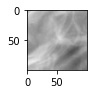

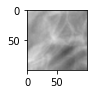

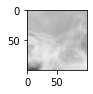

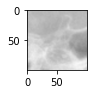

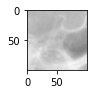

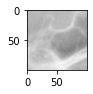

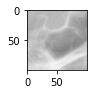

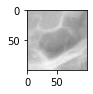

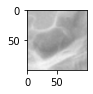

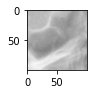

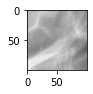

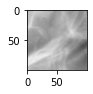

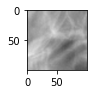

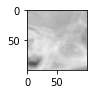

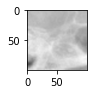

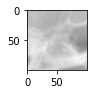

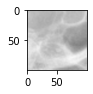

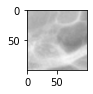

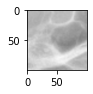

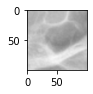

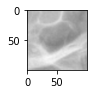

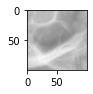

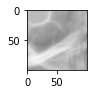

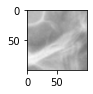

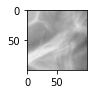

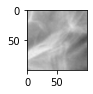

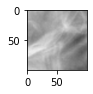

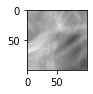

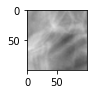

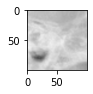

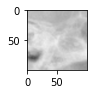

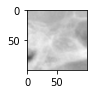

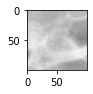

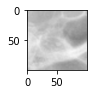

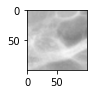

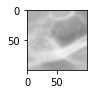

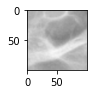

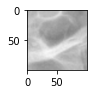

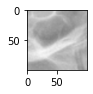

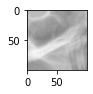

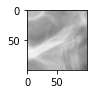

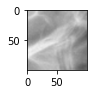

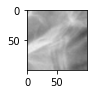

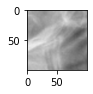

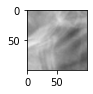

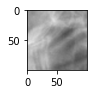

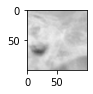

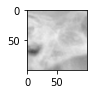

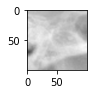

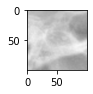

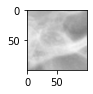

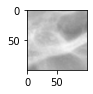

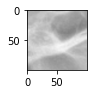

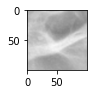

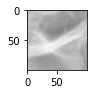

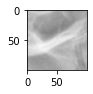

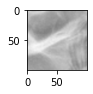

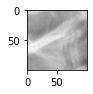

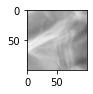

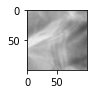

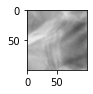

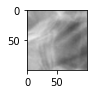

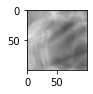

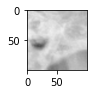

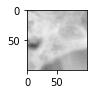

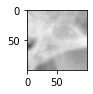

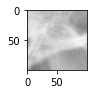

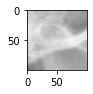

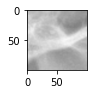

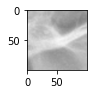

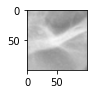

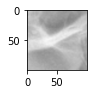

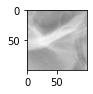

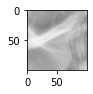

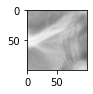

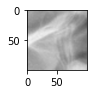

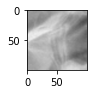

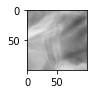

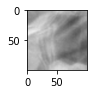

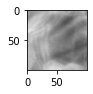

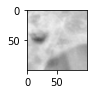

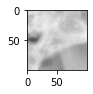

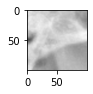

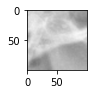

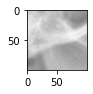

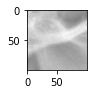

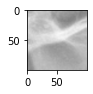

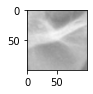

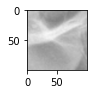

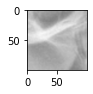

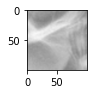

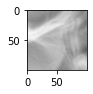

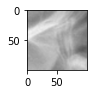

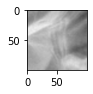

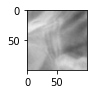

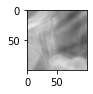

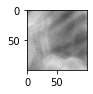

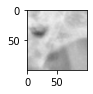

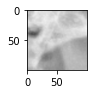

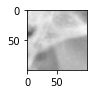

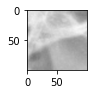

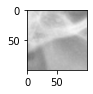

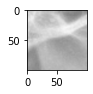

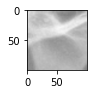

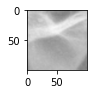

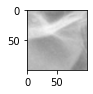

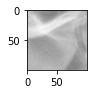

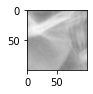

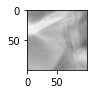

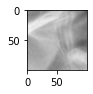

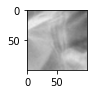

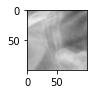

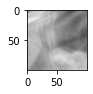

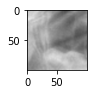

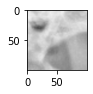

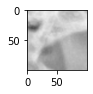

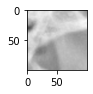

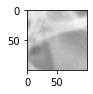

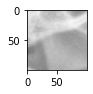

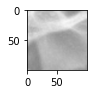

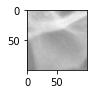

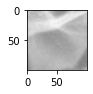

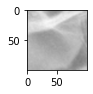

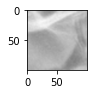

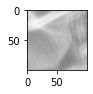

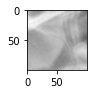

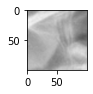

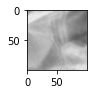

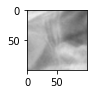

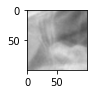

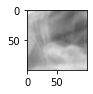

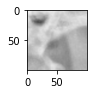

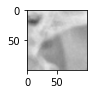

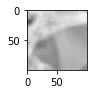

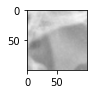

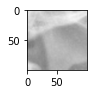

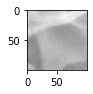

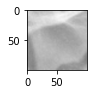

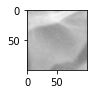

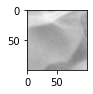

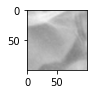

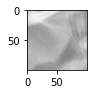

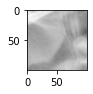

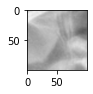

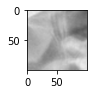

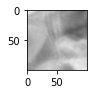

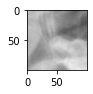

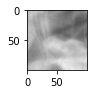

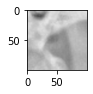

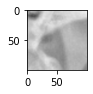

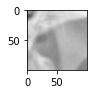

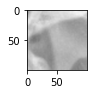

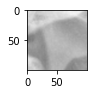

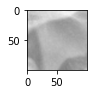

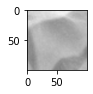

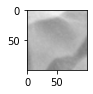

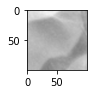

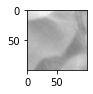

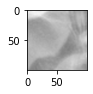

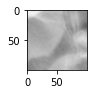

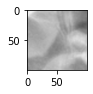

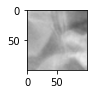

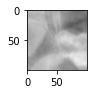

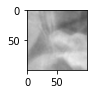

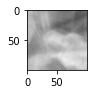

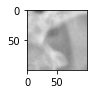

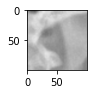

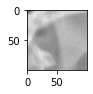

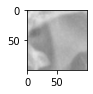

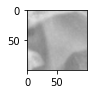

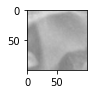

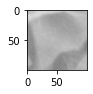

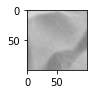

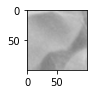

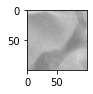

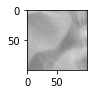

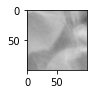

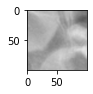

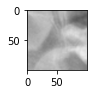

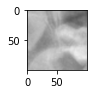

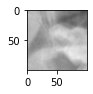

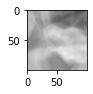

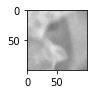

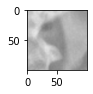

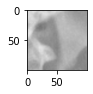

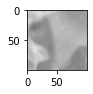

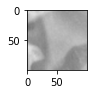

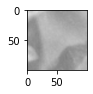

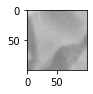

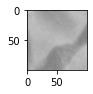

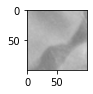

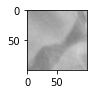

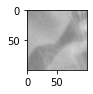

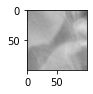

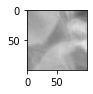

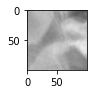

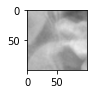

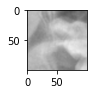

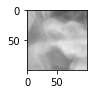

In [16]:
for i in range(len(images)):
    plt.figure(figsize = (150, 150))
    plt.subplot((len(images)//3)+1, 3, i+1)
    plt.imshow(images[i])
    plt.show()

## Sauvegarder les images

In [26]:
NEG_PATH = os.path.join('/content/drive/MyDrive/pointSdata', 'negative')
POS_PATH = os.path.join('/content/drive/MyDrive/pointSdata', 'positive')
ANC_PATH = os.path.join('/content/drive/MyDrive/pointSdata', 'anchor')
# PS_PATH = os.path.join('/content/drive/MyDrive/pointSdata', 'models')

In [ ]:
# os.makedirs(NEG_PATH)
# os.makedirs(POS_PATH)
# os.makedirs(ANC_PATH)
os.makedirs(PS_PATH)

In [ ]:
# Import uuid library to generate unique image names
import uuid

In [ ]:
def save_imgs(list_imgs):
    for i in range(len(list_imgs)):
        img = list_imgs[i]
        img = cv2.resize(img, (500, 500))
        filename = os.path.join(PS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(filename, img)    

In [ ]:
for i in range(1,len(img_list)):
    images = extract_imgs(img_list[i], 50, 50)
    save_imgs(images)

## Siamese Neural Network

### Data augmentation

In [ ]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        # img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    return data

In [ ]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
for file_name in os.listdir(os.path.join(ANC_PATH)):
    img_path = os.path.join(ANC_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [27]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(1000)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(1000)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(1000)

## Data Normalization

In [28]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [29]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [22]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [30]:
samples = data.as_numpy_iterator()
example = samples.next()

In [31]:
res = preprocess_twin(*example)

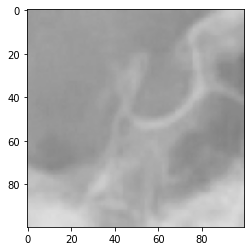

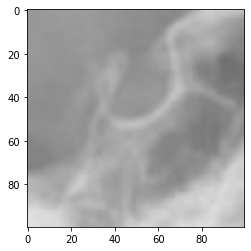

In [32]:
plt.imshow(res[1])
plt.show()
plt.imshow(res[0])
plt.show()

In [ ]:
res[2]

In [33]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [34]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(340)
train_data = train_data.prefetch(170)

In [35]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(340)
test_data = test_data.prefetch(170)

## Siamese Neural Networks for One-Shot learning

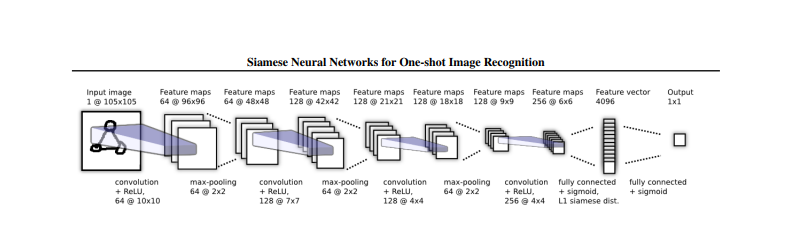

In [17]:
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [ ]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

## Siamese distance

In [18]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [ ]:
l1 = L1Dist()

In [ ]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [ ]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [ ]:
siamese_layer = L1Dist()

In [ ]:
distances = siamese_layer(inp_embedding, val_embedding)

In [ ]:
classifier = Dense(1, activation='sigmoid')(distances)

In [ ]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

## Make siamese model

In [ ]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()

In [ ]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

### Cross loss

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

### Optimizer

In [ ]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## Training

In [ ]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
EPOCHS = 20

In [ ]:
train(train_data, EPOCHS)

In [ ]:
# Save weights
siamese_model.save('point_S_model.h5')

In [19]:
model = tf.keras.models.load_model('/content/drive/MyDrive/pointSdata/point_S_model.h5', compile=False,
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
# plt.imshow(test_input[5])
# plt.show()
# plt.imshow(test_val[5])
# plt.show()

test_input[:1]

In [ ]:
# Make predictions with reloaded model
a = str(model.predict([test_input[:1], test_val[:1]])[0][0].round(3))

In [ ]:
a

In [37]:

i = 1
j = 1
while(i<(340*2)):
    plt.figure(figsize = (20, 400))
    #a = str(model.predict([test_input[j-1:j], test_val[j-1:j]]))
    a = "Sim = " + str(model.predict([test_input[j-1:j], test_val[j-1:j]])[0][0].round(3))
    plt.subplot(340, 2, i)
    plt.imshow(test_input[j-1])
    i += 1
    plt.subplot(340, 2, i)
    plt.imshow(test_val[j-1])
    i += 1
    plt.title(a)
    j += 1
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def make_prediction(img):
    #extraction des images 50 x 50
    list_imgs = extract_imgs(img, 50, 50)
    np_data = np.array(list_imgs)
    return np_data

In [ ]:
point_S_images = []
img = cv2.imread('p2.jpg')
img = img/255.0
img = cv2.resize(img, (100, 100))
for i in range(340):
    point_S_images.append(img)
#plt.imshow(img)
#img = cv2.imread('test.jpg')
#len(img)
# my_data = make_prediction(img)
# plt.imshow(my_data[0])

In [ ]:
point_S_data = np.array(point_S_images)

In [ ]:
point_S_data.shape

In [ ]:
img = cv2.imread('test.jpg')
len(img)
my_data = make_prediction(img)
my_data.shape

In [ ]:
i = 1
j = 1
while(i<(340*2)):
    plt.figure(figsize = (20, 300))
    #a = str(model.predict([test_input[j-1:j], test_val[j-1:j]]))
    a = "Sim = " + str(model.predict([point_S_data[j-1:j], my_data[j-1:j]])[0][0].round(3))
    plt.subplot(340, 2, i)
    plt.imshow(point_S_data[j-1])
    i += 1
    plt.subplot(340, 2, i)
    plt.imshow(my_data[j-1])
    i += 1
    plt.title(a)
    j += 1
    plt.show()

In [ ]:
siamese_model.save('point-s-model.tf')

In [ ]:
plt.imshow(test_input[11])
plt.show()
plt.imshow(test_val[11])
plt.show()

In [ ]:
from skimage import color

In [ ]:
img = cv2.imread('point_s.jpg')
imgGray = color.rgb2gray(img)
test_img = cv2.resize(imgGray, (60, 60))
test_img = sobel(test_img)
tes_img = test_img/255.0
plt.imshow(test_img, cmap = "gray")
plt.show()
# plt.imshow(imgGray, cmap = "gray")
# plt.show()

In [ ]:
img1 = cv2.imread('img1.png')
img1 = cv2.resize(img1, (600, 600))
img1 = color.rgb2gray(img1)
img1 = img1 / 255.0
plt.imshow(img1, cmap = "gray")

In [ ]:
def images_generator(img):
    imgs_list = []
    for i in range(541):
        for j in range(541):
            img1 = img[i:i+60, j:j+60]
            imgs_list.append(sobel(img1))
    return imgs_list

In [ ]:
def indixes_generator(img):
   # imgs_list = []
    for i in range(541):
        for j in range(541):
            img1 = img[i:i+60, j:j+60]
            if (np.array_equal(img1,res)):
                print("ligne = ", i)
                print("colonne = ", j)
            #imgs_list.append(sobel(img1))

In [ ]:
indixes_generator(img1)

In [ ]:
imgs_list = images_generator(img1)

In [ ]:
print(LossDice(test_img, test_img))

In [ ]:
def LossDice(y_true, y_pred):
  numerateur  =tf.reduce_sum(y_true*y_pred).numpy()
  denominateur=tf.reduce_sum(y_true ** 2).numpy()+tf.reduce_sum(y_pred ** 2).numpy()
  dice=2*numerateur/(denominateur)
  return dice

In [ ]:
max = 0
res = 0
i = 0
for img in imgs_list:
    l = LossDice(test_img, img)
    if (l > max):
        max = l
        res = img
        indice = i
    i +=1
plt.imshow(res, cmap = "gray")
plt.show()
print(max)
print(indice)

In [ ]:
83737/540
#138822/540 - int(138822/540)
#540 * 0.0777777777778

In [ ]:
int((138822/540 - int(138822/540))*540)

In [ ]:
res = imgs_list[138822]
print(res)

In [ ]:
plt.imshow(imgs_list[138822], cmap = "gray")

In [ ]:
#img1[257:257+60, 420:420+60] = 0
plt.imshow(img1, cmap = "gray")

In [ ]:
from skimage import color

In [ ]:
img1 = cv2.imread('img1.png')
img1 = cv2.resize(img1, (600, 600))
img2 = cv2.imread('img2.jpeg')
img2 = cv2.resize(img2, (600, 600))
img3 = cv2.imread('img3.jpg')
img3 = cv2.resize(img3, (600, 600))
#redimensionner l'image
imgGray1 = color.rgb2gray(img1)
imgGray2 = color.rgb2gray(img2)
imgGray3 = color.rgb2gray(img3)

In [ ]:
print(LossDice(imgGray1, imgGray3))